In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
neutral_spheres_statistics = np.load('/lustre/aoc/projects/hera/wchin/neutral_spheres_statistics.npy')

## Check if object is iterable

In [4]:
def iterable(obj):
    
    try:
        iter(obj)
        
    except Exception:
        return False
    
    else:
        return True

## Histogram Function

In [5]:
def histogram(
    y1s, 
    figure_shape, 
    y2s=None,
    y3s=None,
    marker_lines=None,
    y1s_labels=None,
    y2s_label=None,
    y3s_label=None,
    title=None, 
    legend_font_size=12,
    fancy_legend_box=True,
    legend_alpha=0.5,
    shared_title=None,
    shared_title_x_position=0.5,   # figure coordinates, max=1 I think
    shared_title_y_position=0.92,
    shared_x_label=None, 
    shared_x_label_x_position=0.5,
    shared_x_label_y_position=0.08,
    shared_y_label=None, 
    shared_y_label_x_position=0.07,
    shared_y_label_y_postion=0.5,
    x_start=0, 
    x_stop=1, 
    bin_num=int(1e3), 
    color='white', 
    figure_size=(18,7), 
    font_size=15, 
    horizontal_gap=0.05, 
    vertical_gap=0.05, 
    y_scale='linear', 
    y_notation='plain', 
    share_x_axis=True, 
    share_y_axis=True,
    dpi=100
):  # a: x start, b: x stop
    
    bin_edges = np.linspace(x_start, x_stop, bin_num) # bin_num of bins from 0-1
    
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    if np.array(y1s).ndim > 2:  # hopefully more robust condition.
        
        fig, axes = plt.subplots(
            figure_shape[0], 
            figure_shape[1], 
            figsize=figure_size, 
            sharex=share_x_axis, 
            sharey=share_y_axis, 
            gridspec_kw={"hspace":vertical_gap, 'wspace':horizontal_gap},
            dpi=dpi,
            facecolor='#404040'
        )
        
        if shared_title != None:
            
            fig.suptitle(
                x=shared_title_x_position, 
                y=shared_title_y_position, 
                t=shared_title, ha='center', 
                size=1.5*font_size, 
                color=color
            )
            
        if shared_x_label != None:  # shared x label
            fig.text(
                x=shared_x_label_x_position, 
                y=shared_x_label_y_position, 
                s=shared_x_label, ha='center', 
                size=font_size, 
                color=color
            )

        if shared_y_label != None:  # shared y label
            fig.text(
                x=shared_y_label_x_position, 
                y=shared_y_label_y_postion, 
                s=shared_y_label, 
                va='center', 
                rotation='vertical', 
                size=font_size, 
                color=color
            )
        
        for i, y1 in enumerate(y1s):
            
            for ii, marker_line in enumerate(marker_lines):
                
                if i == ii:
                    axes.flatten()[i].plot(
                        bin_centers, 
                        np.histogram(y1s[i,ii,:], bins=bin_edges)[0], 
                        marker_line,
                        linewidth=5,
                        label=y1s_labels[ii]
                )
                else:
                    axes.flatten()[i].plot(
                        bin_centers, 
                        np.histogram(y1s[i,ii,:], bins=bin_edges)[0], 
                        marker_line,
                        label=y1s_labels[ii],
                        alpha=0.75
                )
            
            if iterable(y2s):
                axes.flatten()[i].plot(
                    bin_centers, 
                    np.histogram(y2s[i], bins=bin_edges)[0], 
                    '--', 
                    label=y2s_label
                )
                
                if iterable(y3s):
                    axes.flatten()[i].plot(
                        bin_centers, 
                        np.histogram(y3s[i], bins=bin_edges)[0], 
                        label=y3s_label
                    )
                    
                    
            if y1s_labels != None:
                axes.flatten()[i].legend(
                    prop={'size': legend_font_size}, 
                    fancybox=fancy_legend_box, 
                    framealpha=legend_alpha
                )
                
            if title != None:
                axes.flatten()[i].set_title(title[i], color=color, fontsize=font_size)
                
            axes.flatten()[i].set_yscale(y_scale)
            
            if y_notation == 'sci':
                axes.flatten()[i].ticklabel_format(
                    axis='y', 
                    style=y_notation, 
                    scilimits=(0,0), 
                    useMathText=True
                )
                
            axes.flatten()[i].tick_params(
                color=color, 
                labelcolor=color, 
                labelsize=font_size, 
                which='both'
            )  # font style

            for spine in axes.flatten()[i].spines.values():  # figure color
                spine.set_edgecolor(color)
                
    else:
        
        fig, ax = plt.subplots(figsize=figure_size)
        
        ax.plot(bin_centers, np.histogram(y1s, bins=bin_edges)[0], label=y1s_labels)
        
        if y2s != None:
            ax.plot(bin_centers, np.histogram(y2s, bins=bin_edges)[0], '--', label=y2s_label)
            
            if y3s == None:
                ax.legend(
                    prop={'size': legend_font_size}, 
                    fancybox=fancy_legend_box, 
                    framealpha=legend_alpha
                )                 
                
            else:
                ax.plot(bin_centers, np.histogram(y3s, bins=bin_edges)[0], '-.', label=y3s_label)
                ax.legend(
                    prop={'size': legend_font_size}, 
                    fancybox=fancy_legend_box, 
                    framealpha=legend_alpha
                )                 
                
        if title != None:
            ax.set_title(title, color=color, fontsize=font_size)
            
        ax.set_yscale(y_scale)
        
        if y_notation == 'sci':
            ax.ticklabel_format(axis='y', style=y_notation, scilimits=(0,0), useMathText=True)
            
        ax.tick_params(color=color, labelcolor=color, labelsize=font_size, which='both')  # font style

        for spine in ax.spines.values():  # figure color
            spine.set_edgecolor(color)
            
    plt.show()

In [6]:
overall_neutral_fractions = np.array([0.2, 0.2037, 0.1951])
iterations = np.array([1445, 180, 54])
distribution_iterations = 24400

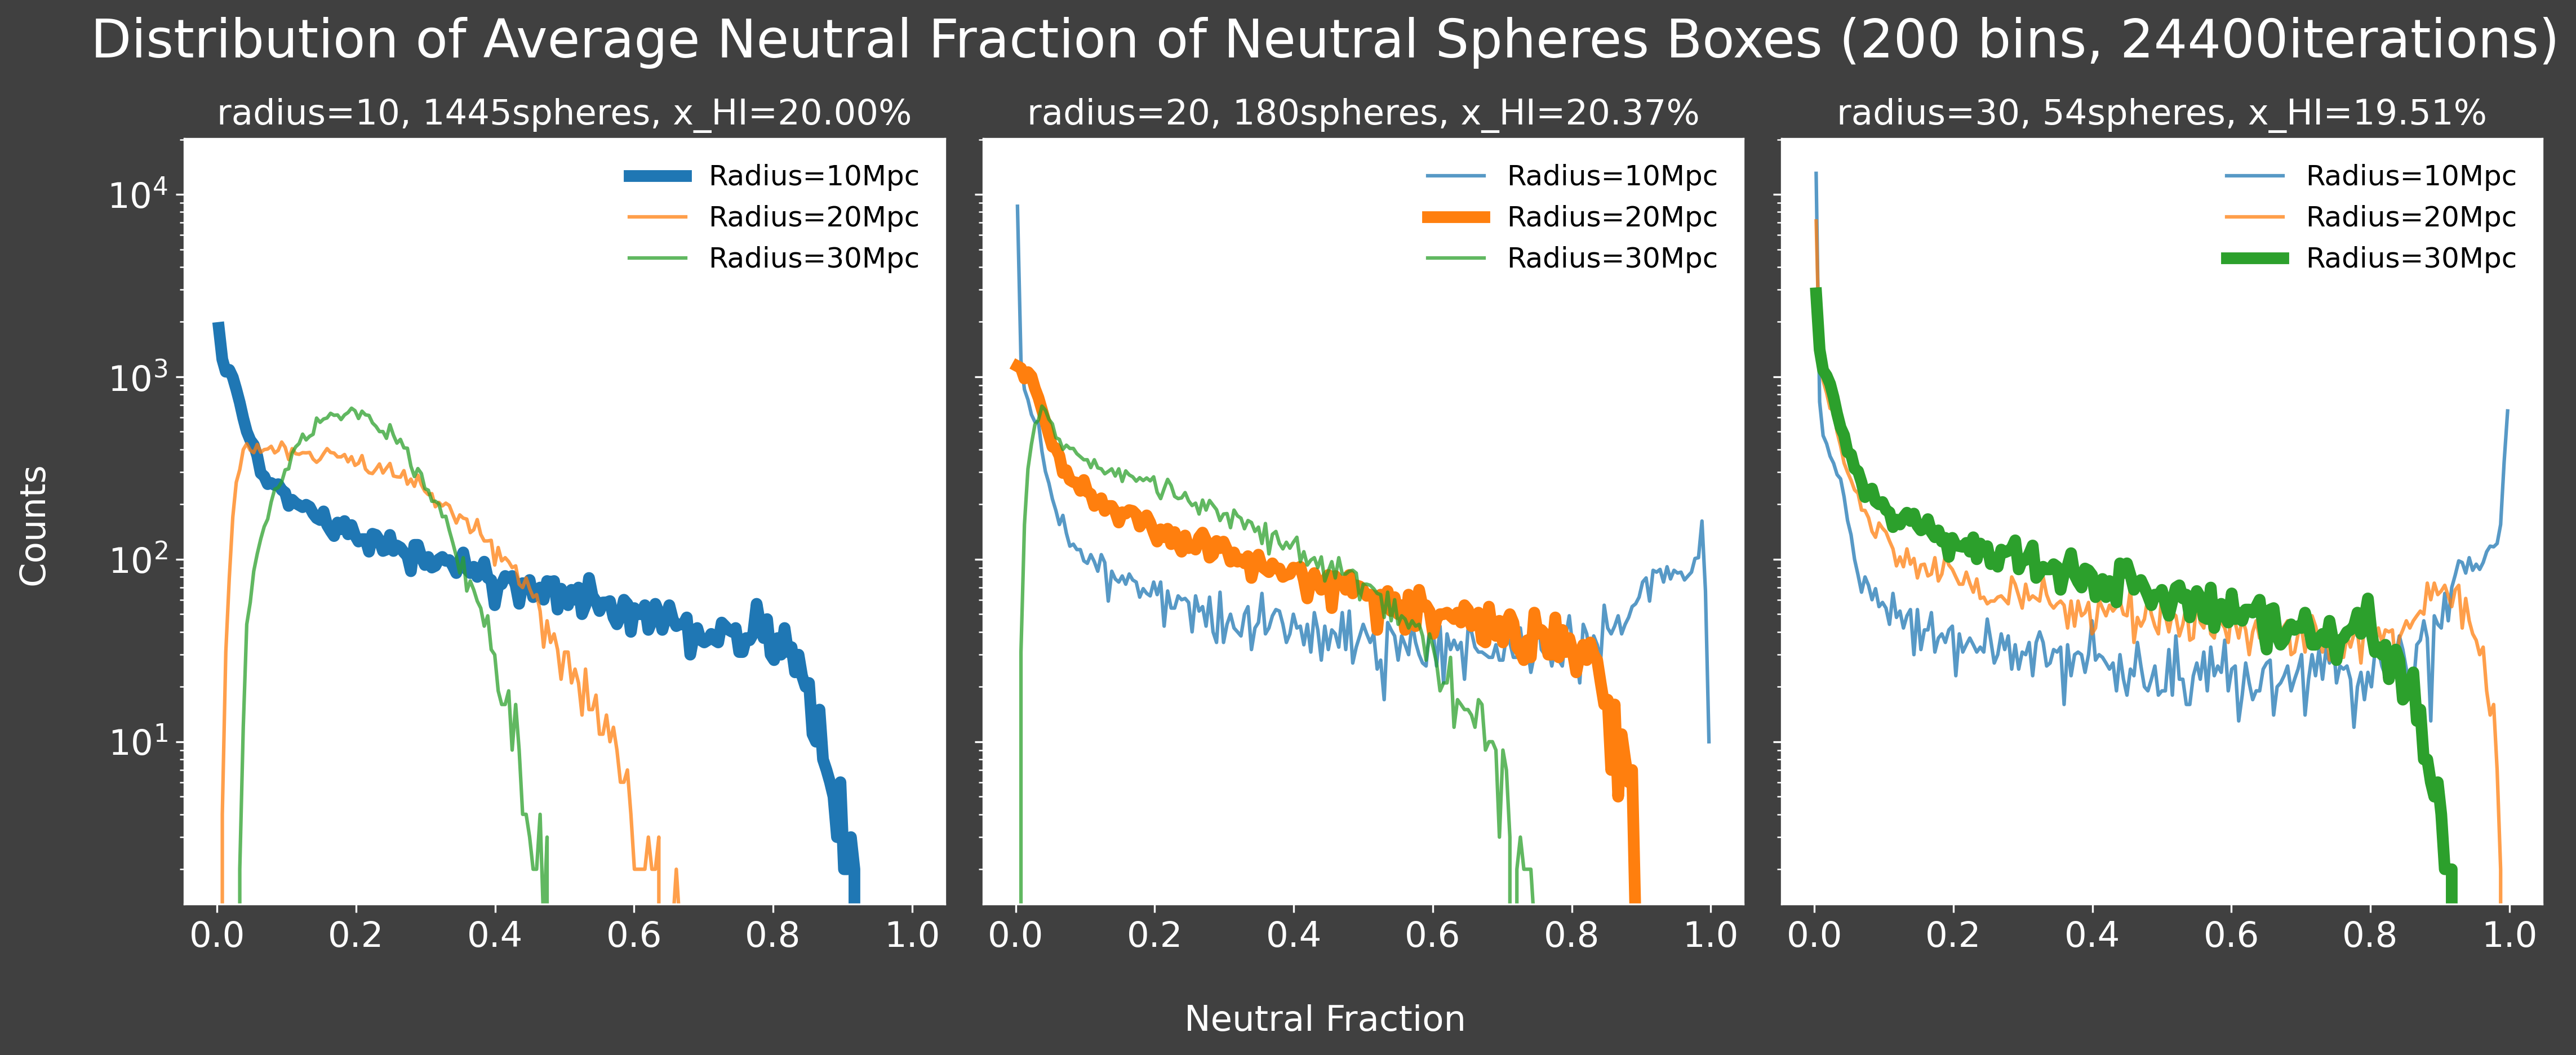

In [7]:
radii=[10, 20, 30]
bins = int(2e2)
histogram(
    y1s=neutral_spheres_statistics,       
    marker_lines=['-']*len(radii),
    y1s_labels=[f'Radius={radius:d}Mpc' for radius in radii],
    legend_alpha=0,
    bin_num=bins,   
    title=[f'radius={radii[i]:d}, {iterations[i]:d}spheres, x_HI={x_HI*100:.2f}%' for i,
           x_HI in enumerate(overall_neutral_fractions[:])],
    shared_title=f'Distribution of Average Neutral Fraction \
of Neutral Spheres Boxes ({bins:d} bins, {distribution_iterations:d}iterations)',
    shared_title_y_position=1,
    shared_y_label='Counts',
    shared_x_label='Neutral Fraction',
    shared_x_label_y_position=0,
    figure_shape=(1,3), 
    figure_size=(18,6),
    vertical_gap=0.1,
    horizontal_gap=0.05,
    y_scale='log',
#     y_notation='sci',
    share_y_axis=True,
    dpi=300,
    color='w'
)

In [8]:
NeutralSphereStats_DataR40_SampleR10_20 = np.load('/lustre/aoc/projects/hera/wchin/NeutralSphereStats_DataR40_SampleR10,20.npy')
np.shape(NeutralSphereStats_DataR40_SampleR10_20)

(1, 2, 24400)

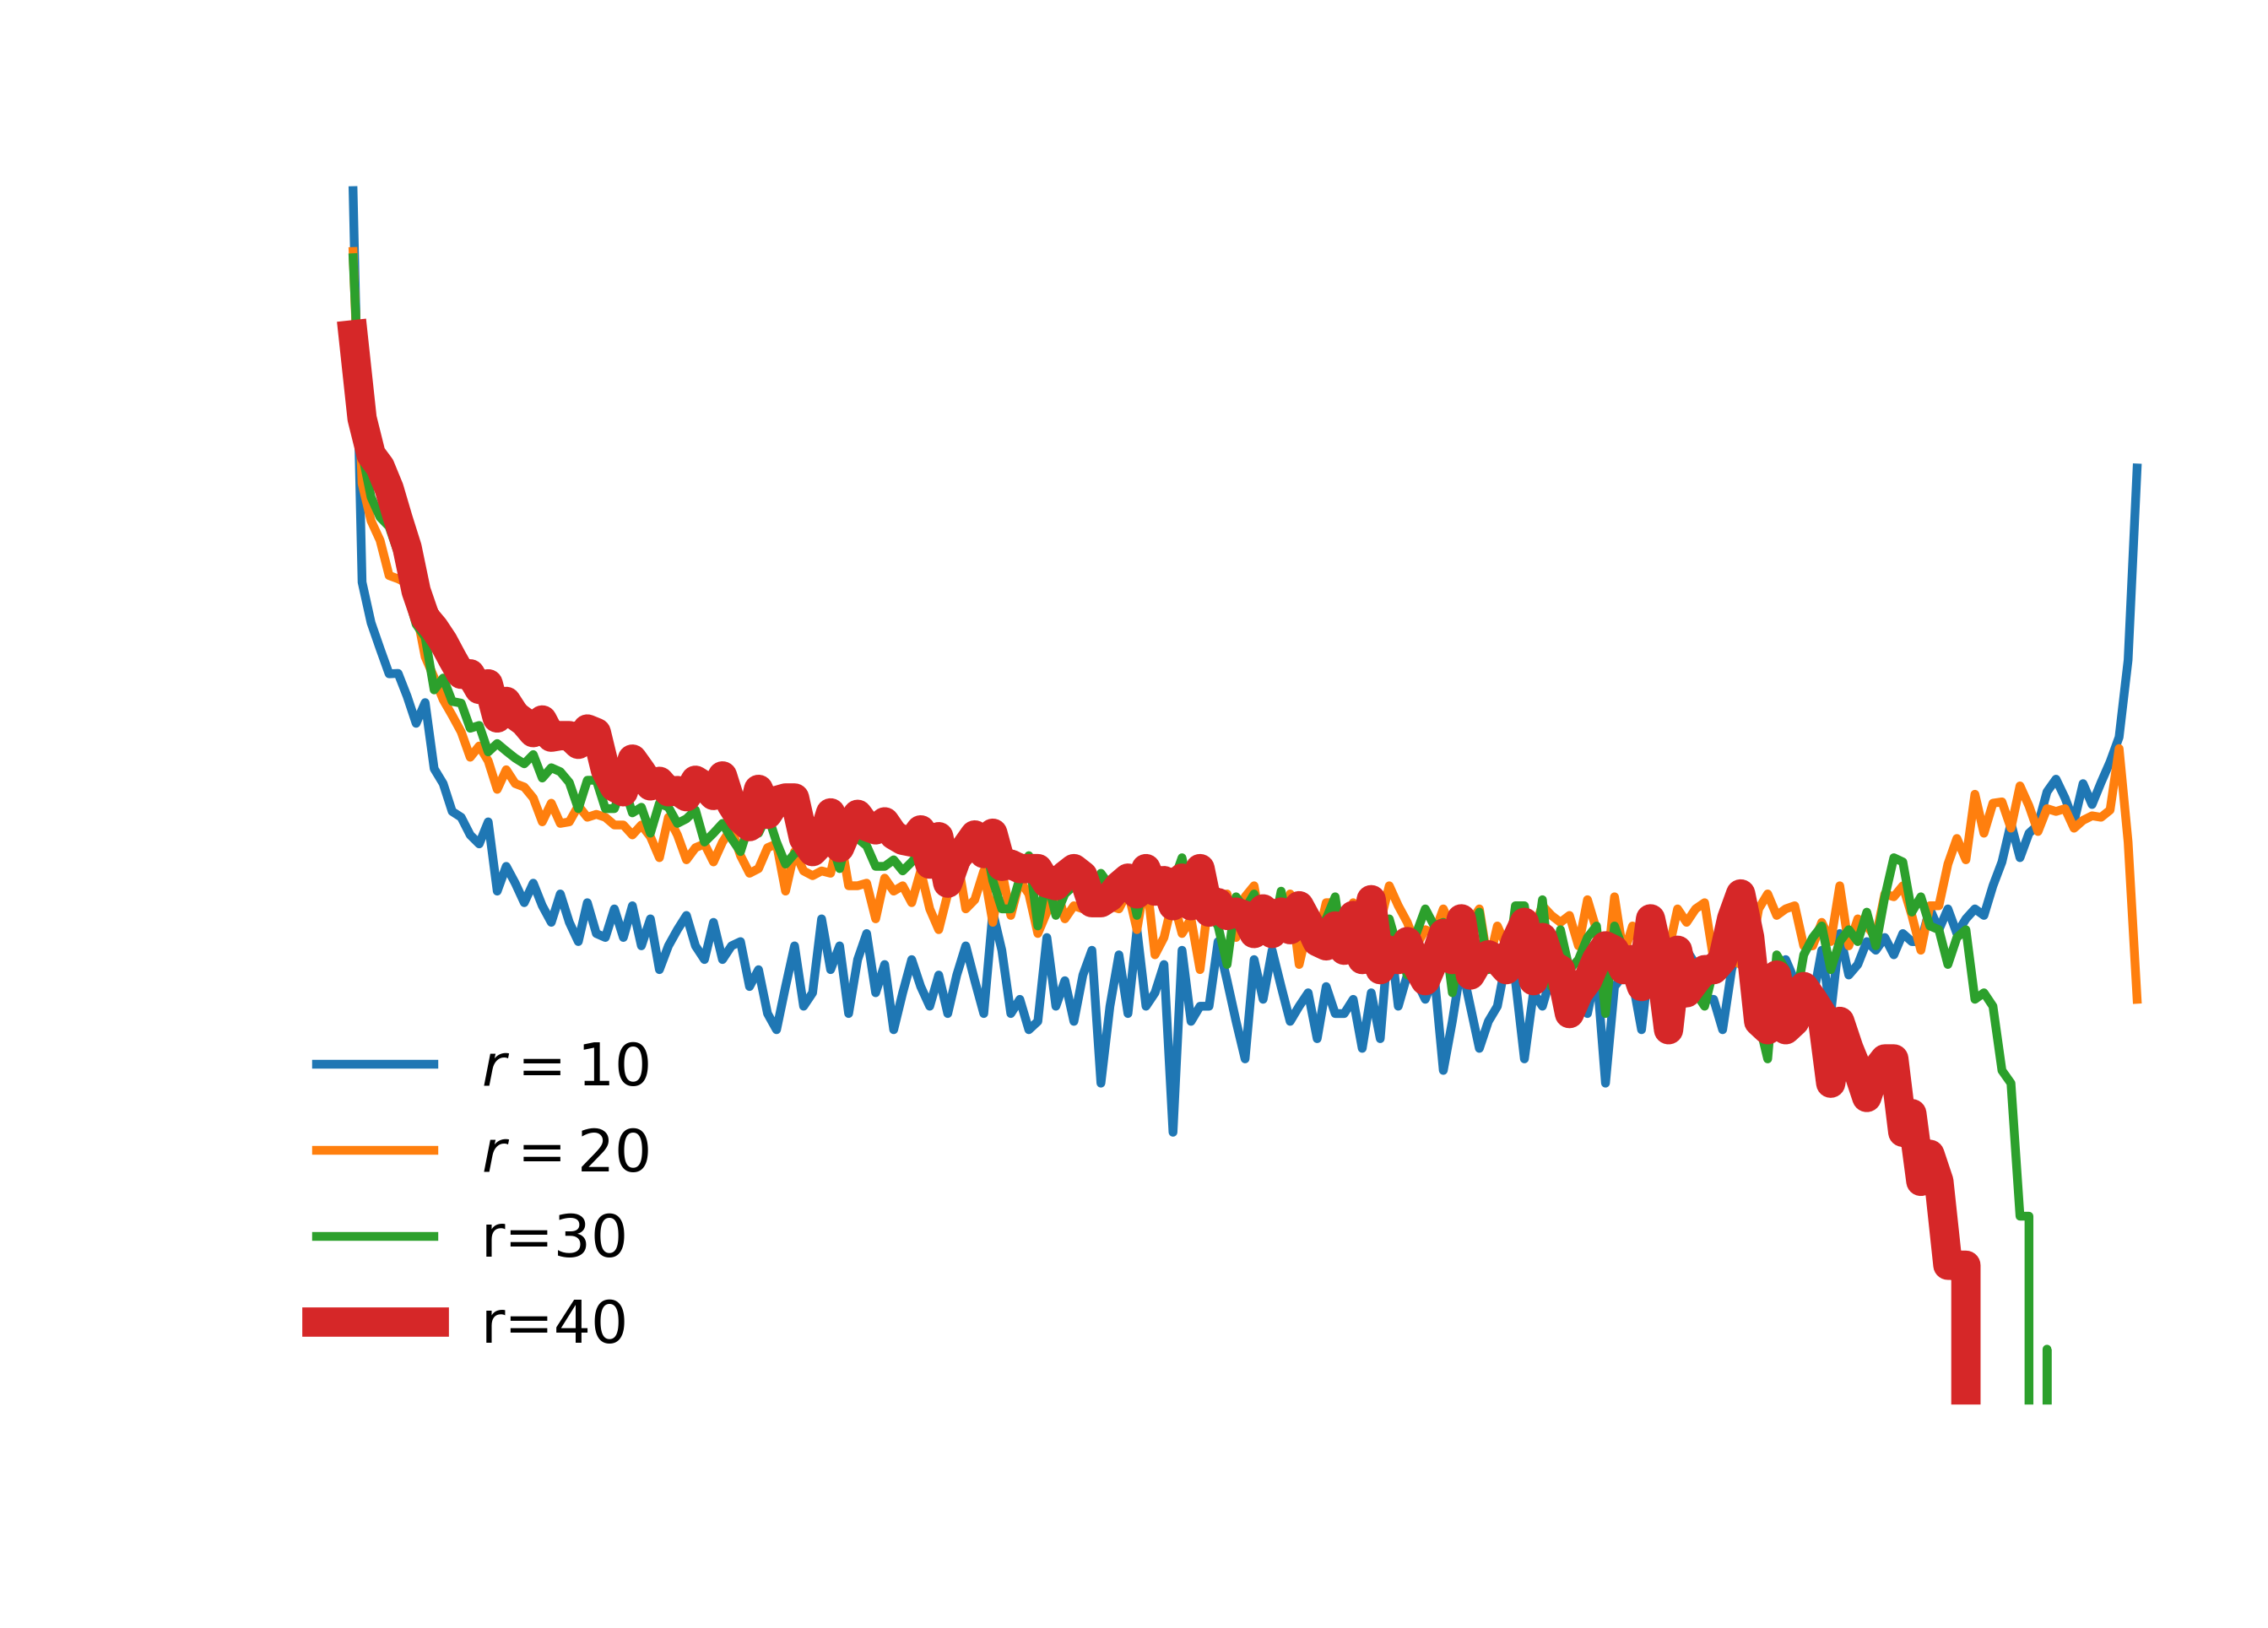

In [9]:
color = 'w'

NeutralSphereStats_DataR40_SampleR10_20 = np.load('/lustre/aoc/projects/hera/wchin/NeutralSphereStats_DataR40_SampleR10,20.npy')
NeutralSphereStats_DataR40_SampleR40 = np.load('/lustre/aoc/projects/hera/wchin/NeutralSphereStats_DataR40_SampleR40.npy')
NeutralSphereStats_DataR40_SampleR30 = np.load('/lustre/aoc/projects/hera/wchin/NeutralSphereStats_DataR40_SampleR30.npy')

fig = plt.figure(dpi=500)
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
bin_edges = np.linspace(0., 1., 200) # bin_num of bins from 0-1
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

for i in range(2):
    plt.semilogy(
        bin_centers,
        np.histogram(NeutralSphereStats_DataR40_SampleR10_20[0, i], bins=bin_edges)[0],
        label=f'$r={radii[i]}$'
    )

plt.semilogy(
    bin_centers,
    np.histogram(NeutralSphereStats_DataR40_SampleR30[0, 0], bins=bin_edges)[0],
    label='r=30'
)
plt.semilogy(
    bin_centers,
    np.histogram(NeutralSphereStats_DataR40_SampleR40[0, 0], bins=bin_edges)[0],
    label='r=40',
    linewidth=5

)

plt.legend(framealpha=0.)
plt.title(f'radius = 40Mpc, 22spheres, $x_{{HI}}=20.36 \%$', color=color)
plt.xlabel(f'Neutral Fraction, $x_{{HI}}$', color=color)
plt.ylabel('Sphere Counts', color=color)
plt.tick_params(color=color, labelcolor=color, which='both')
plt.show()

In [10]:
np.shape(neutral_spheres_statistics)

(3, 3, 24400)

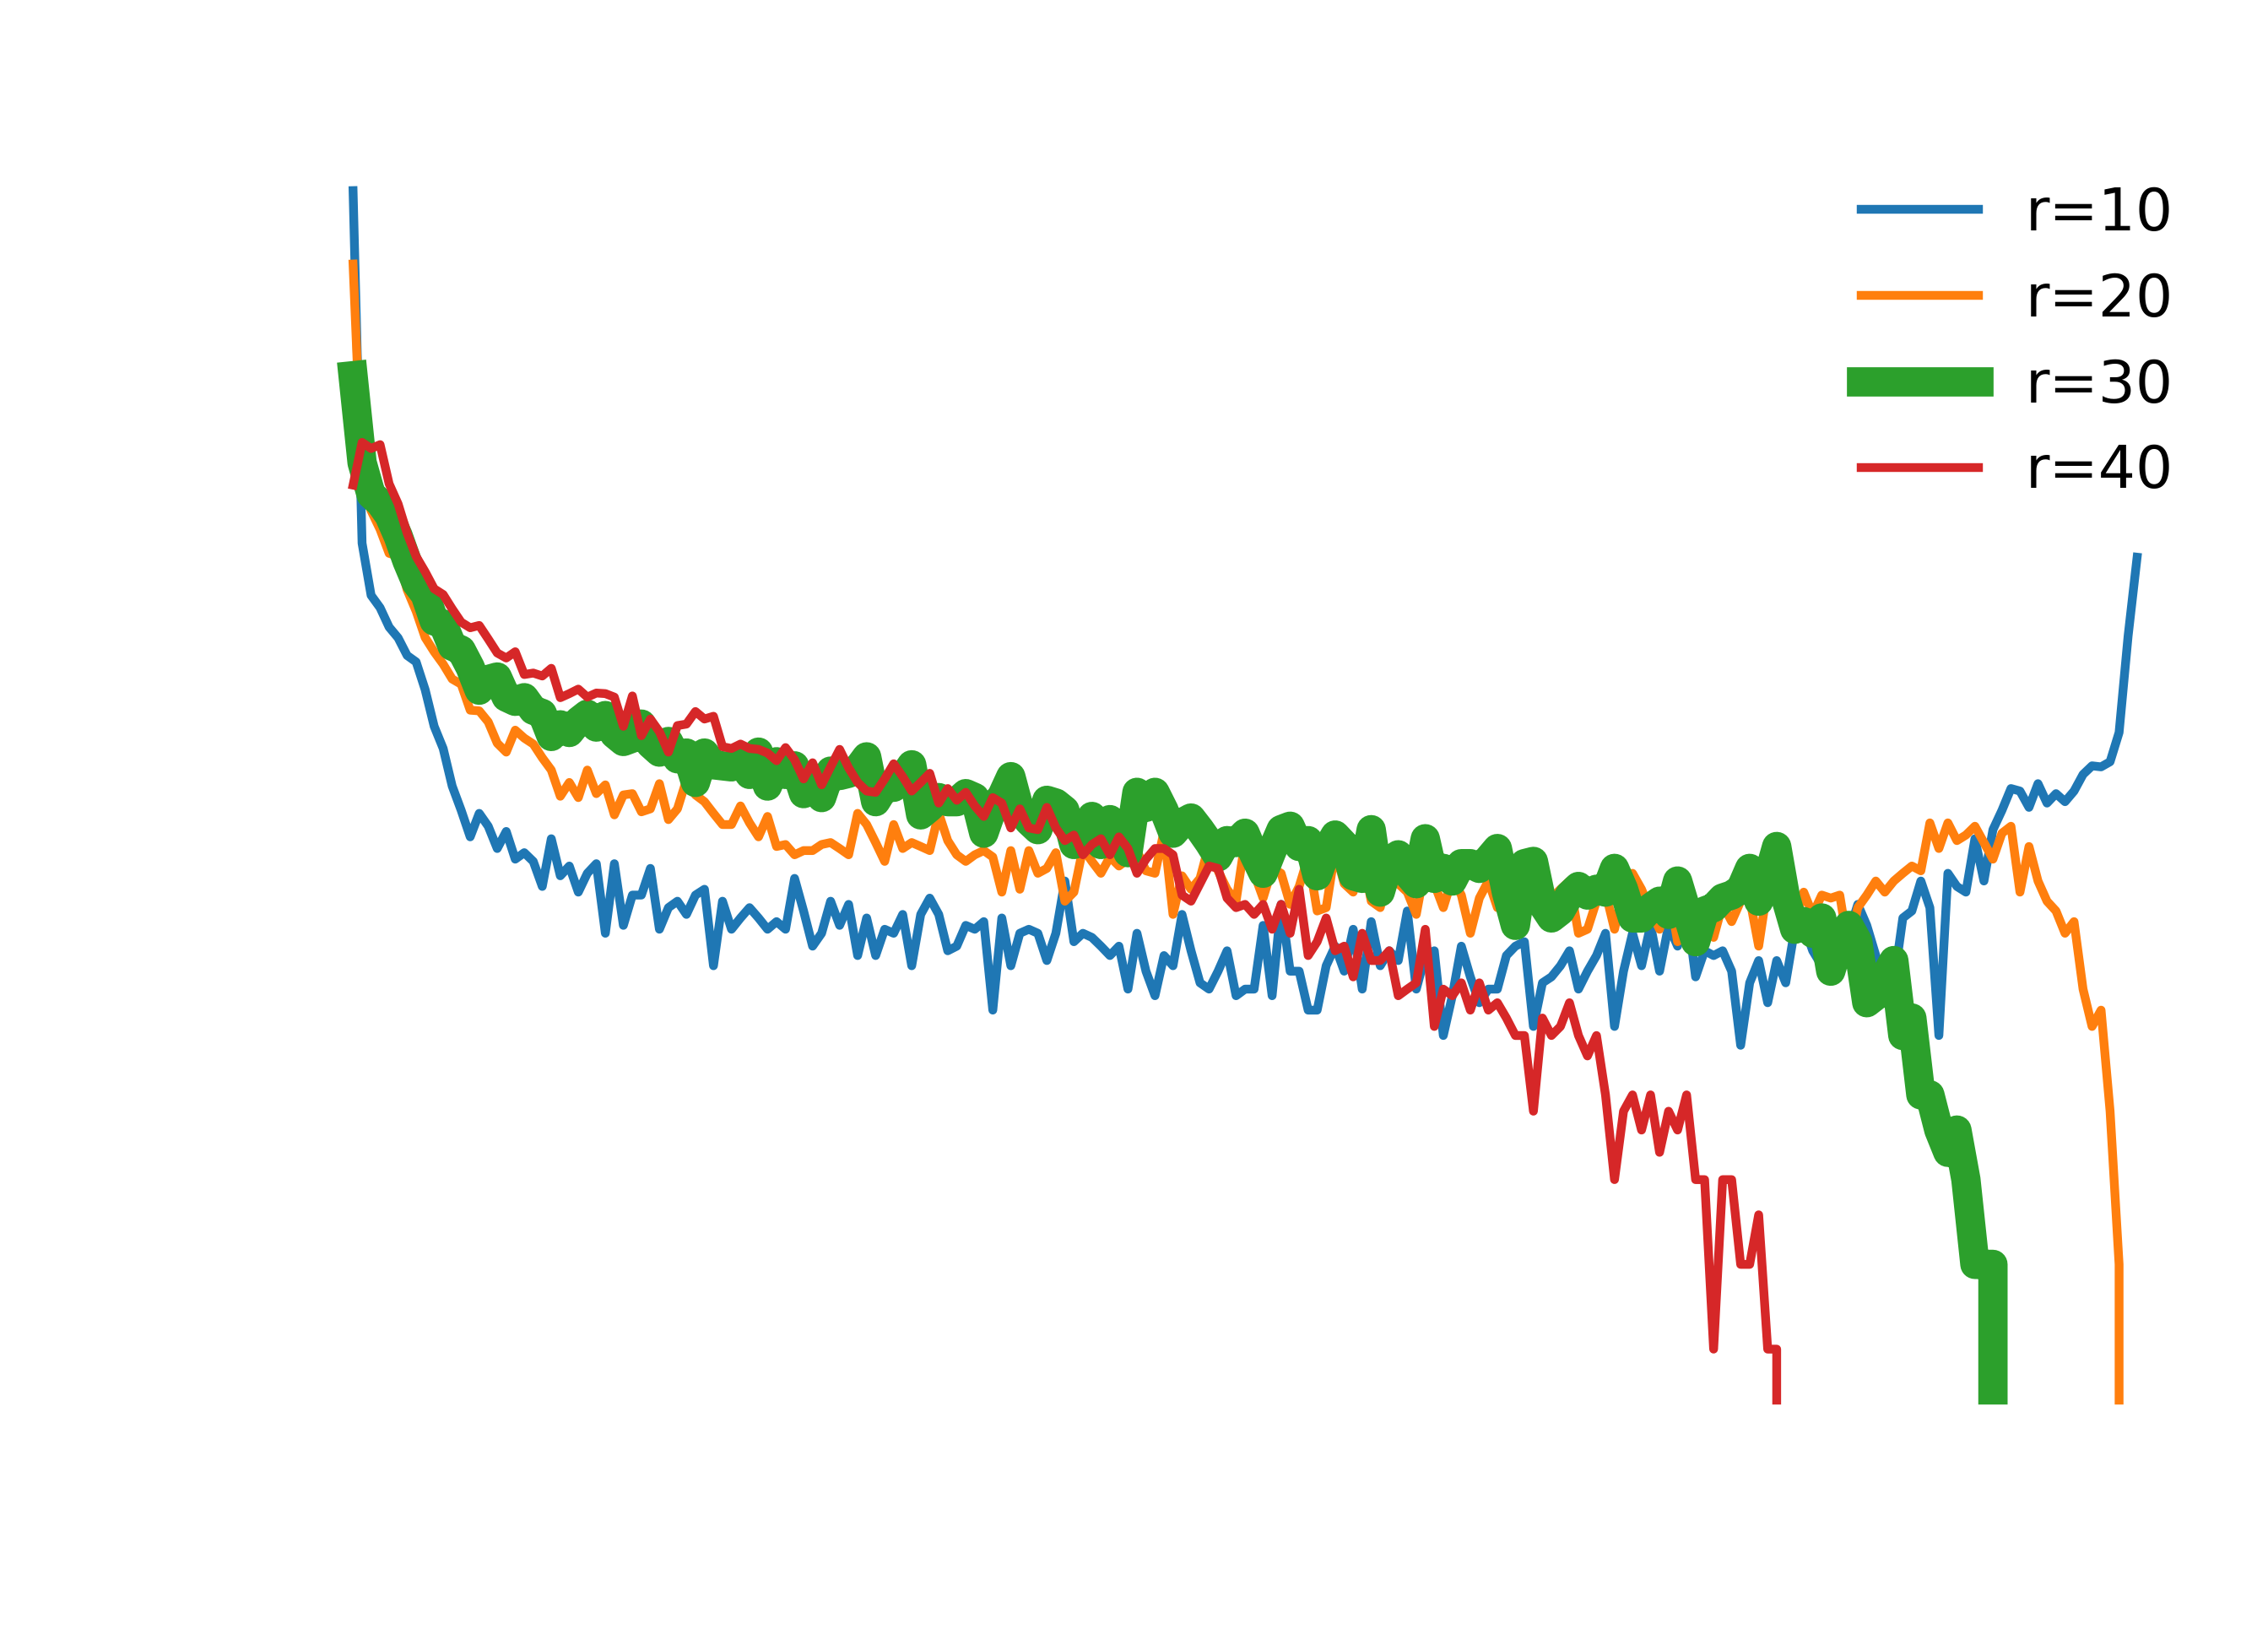

In [11]:
NeutralSphereStats_DataR30_SampleR40 = np.load('/lustre/aoc/projects/hera/wchin/NeutralSphereStats_DataR30_SampleR40.npy')

fig = plt.figure(dpi=500)
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
bin_edges = np.linspace(0., 1., 200) # bin_num of bins from 0-1
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

for i in range(3):
    
    if i == 2:
        plt.semilogy(
            bin_centers,
            np.histogram(neutral_spheres_statistics[2, i], bins=bin_edges)[0],
            label=f'r={radii[i]}',
            linewidth=5
        )   
    else:
        plt.semilogy(
            bin_centers,
            np.histogram(neutral_spheres_statistics[2, i], bins=bin_edges)[0],
            label=f'r={radii[i]}'
        )   

plt.semilogy(
    bin_centers,
    np.histogram(NeutralSphereStats_DataR30_SampleR40[0, 0], bins=bin_edges)[0],
    label='r=40'
)

plt.legend(framealpha=0.)
plt.title(f'radius = 30Mpc, 54spheres, $x_{{HI}}=19.51 \%$', color=color)
plt.xlabel(f'Neutral Fraction, $x_{{HI}}$', color=color)
plt.ylabel('Sphere Counts', color=color)
plt.tick_params(color=color, labelcolor=color, which='both')
plt.show()

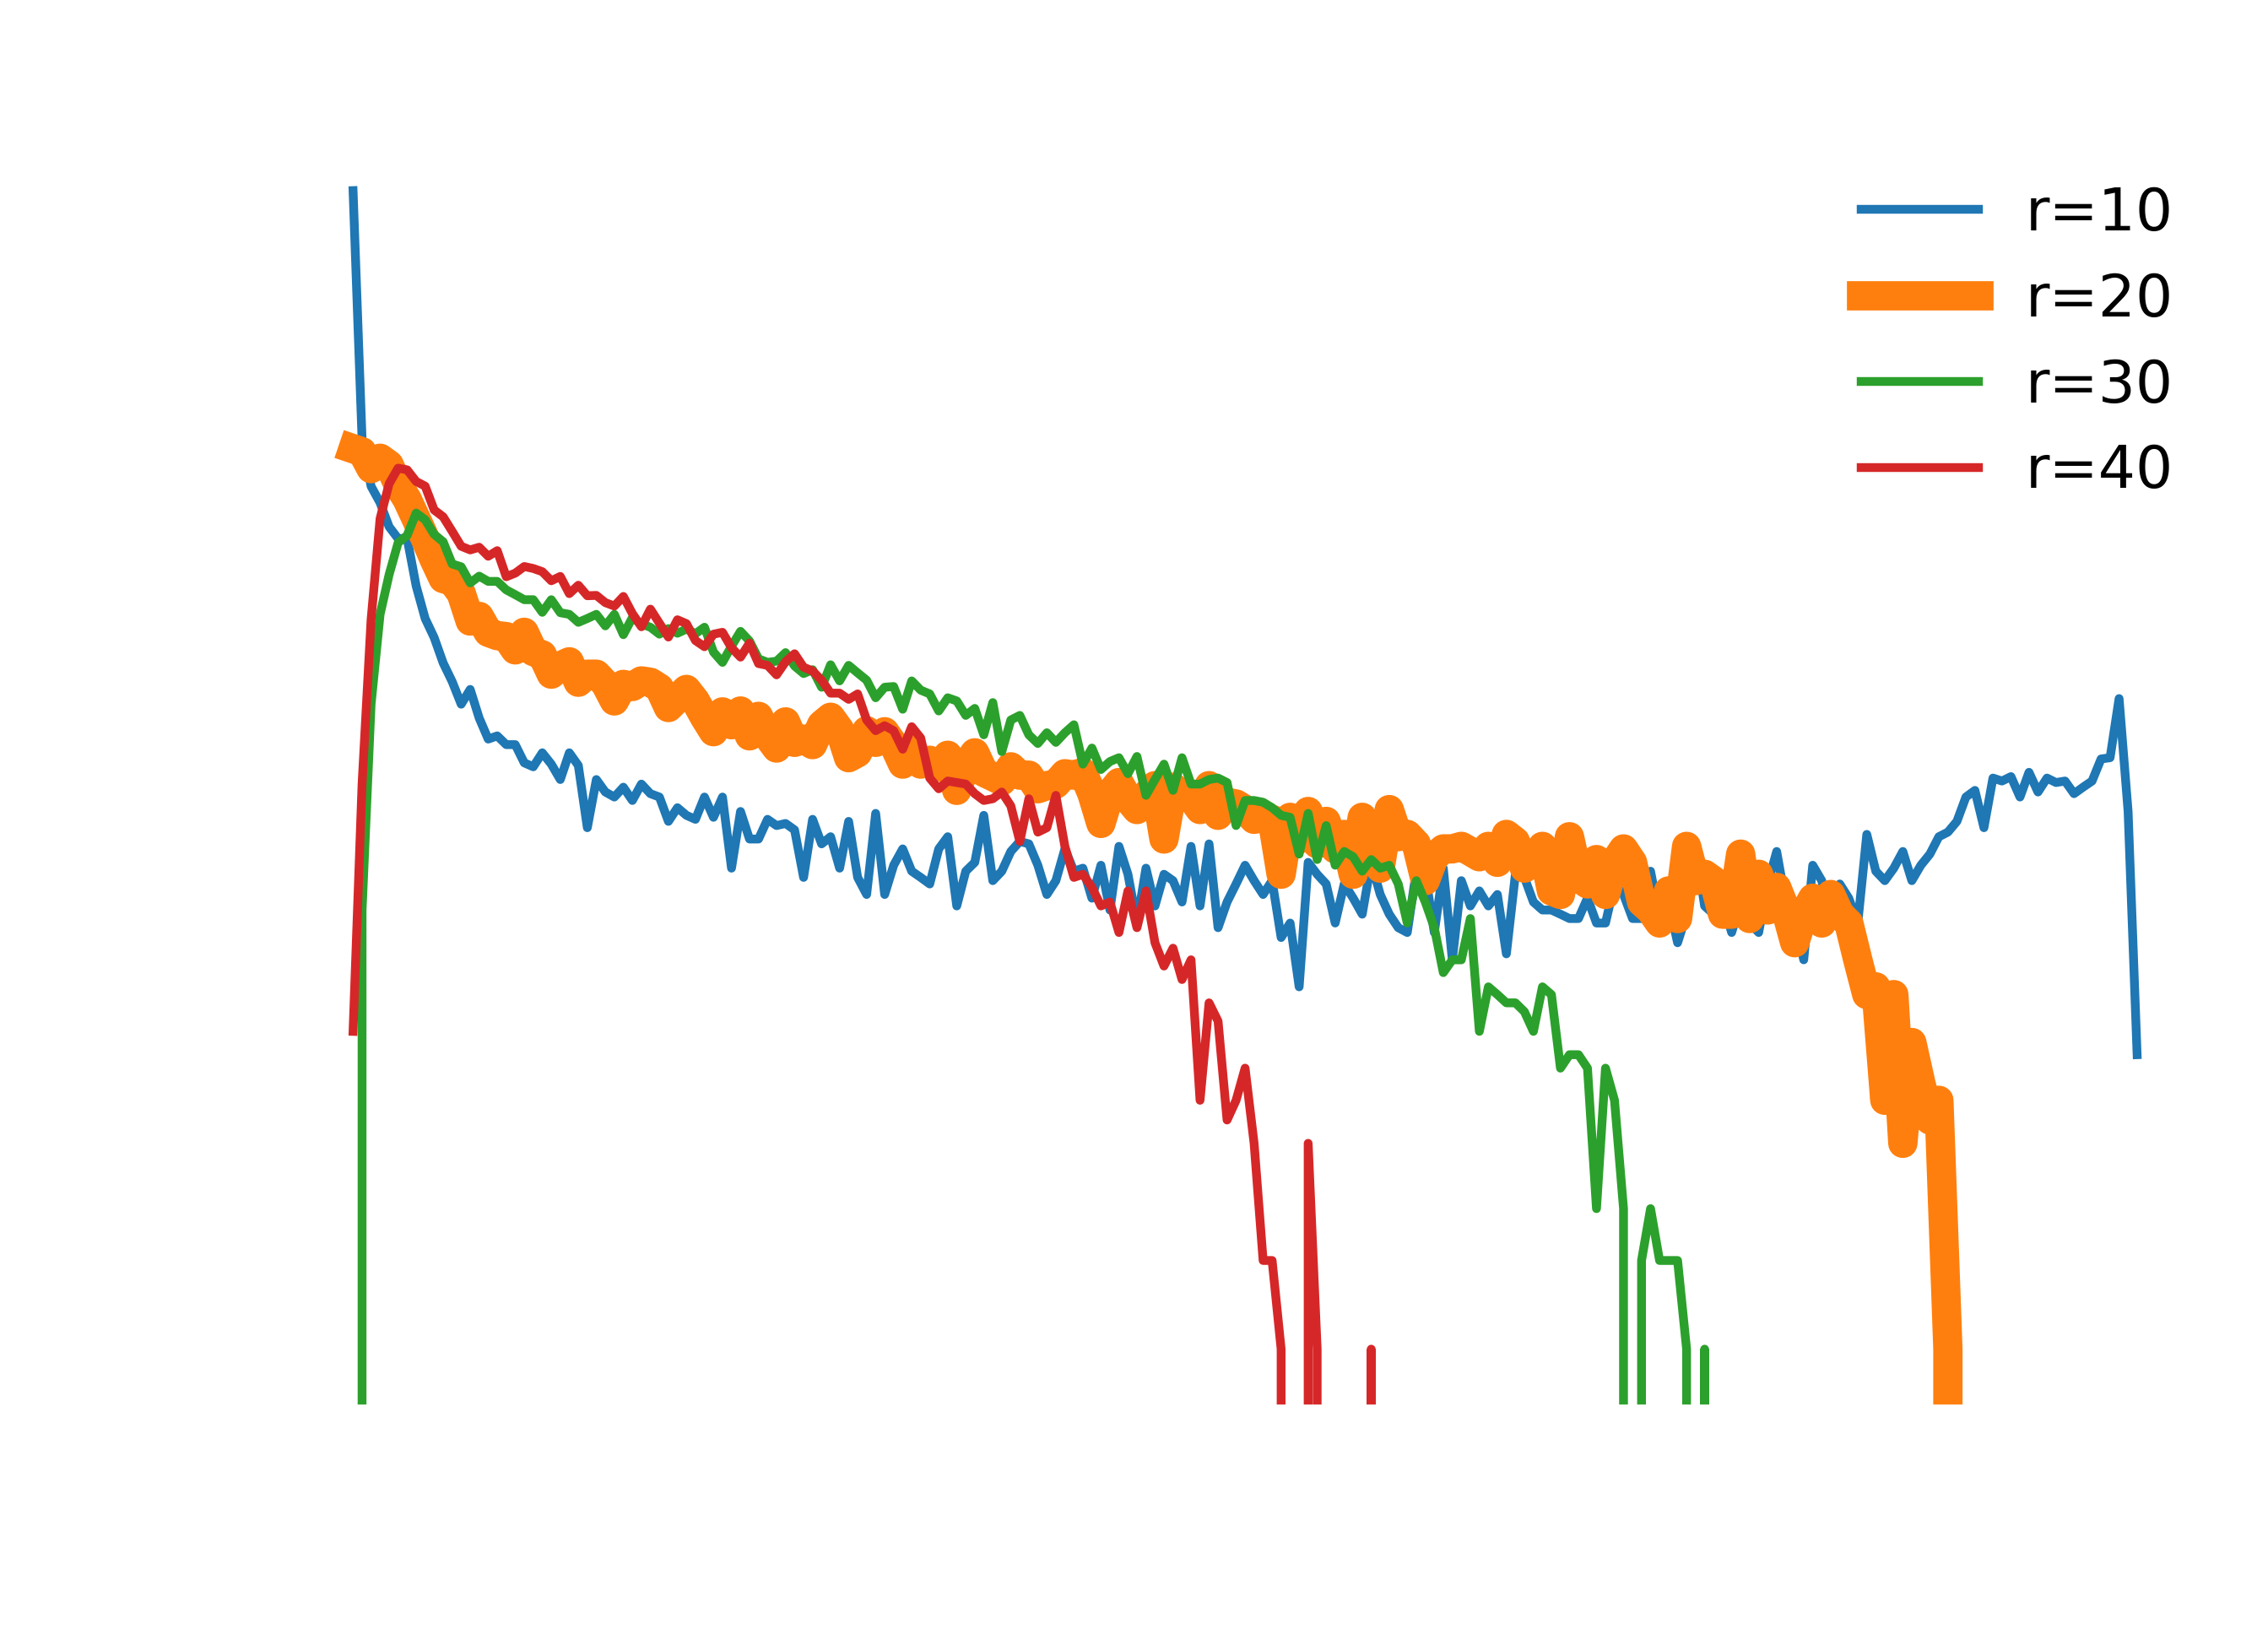

In [12]:
NeutralSphereStats_DataR20_SampleR40 = np.load('/lustre/aoc/projects/hera/wchin/NeutralSphereStats_DataR20_SampleR40.npy')

fig = plt.figure(dpi=500)
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
bin_edges = np.linspace(0., 1., 200) # bin_num of bins from 0-1
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

for i in range(3):
    
    if i == 1:
        plt.semilogy(
            bin_centers,
            np.histogram(neutral_spheres_statistics[1, i], bins=bin_edges)[0],
            label=f'r={radii[i]}',
            linewidth=5
        )   
    else:
        plt.semilogy(
            bin_centers,
            np.histogram(neutral_spheres_statistics[1, i], bins=bin_edges)[0],
            label=f'r={radii[i]}'
        )   

plt.semilogy(
    bin_centers,
    np.histogram(NeutralSphereStats_DataR20_SampleR40[0, 0], bins=bin_edges)[0],
    label='r=40'
)

plt.legend(framealpha=0.)
plt.title(f'radius = 20Mpc, {iterations[1]:.0f}spheres, $x_{{HI}}={overall_neutral_fractions[1]*100.:.2f} \%$', color=color)
plt.xlabel(f'Neutral Fraction, $x_{{HI}}$', color=color)
plt.ylabel('Sphere Counts', color=color)
plt.tick_params(color=color, labelcolor=color, which='both')
plt.show()

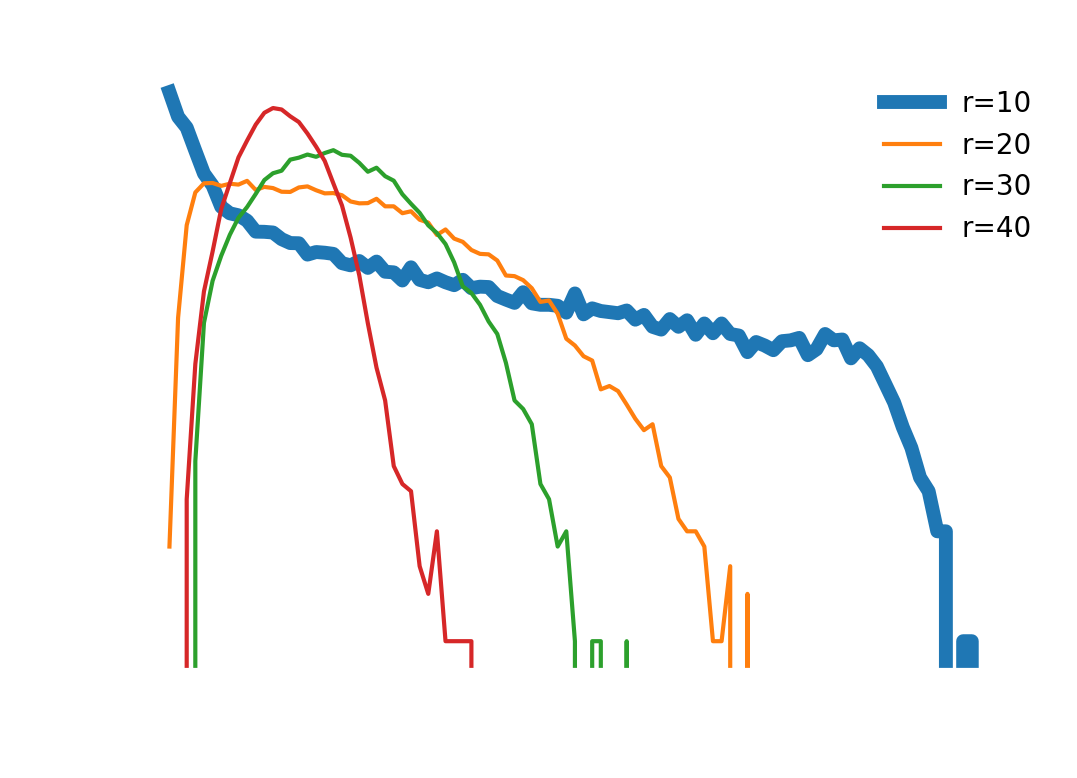

In [13]:
NeutralSphereStats_DataR10_SampleR40 = np.load('/lustre/aoc/projects/hera/wchin/NeutralSphereStats_DataR10_SampleR40.npy')

r_ind = 0

fig = plt.figure(dpi=200)
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
bin_edges = np.linspace(0., 1., 100) # bin_num of bins from 0-1
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

for i in range(3):
    
    if i == r_ind:
        plt.semilogy(
            bin_centers,
            np.histogram(neutral_spheres_statistics[r_ind, i], bins=bin_edges)[0],
            label=f'r={radii[i]}',
            linewidth=5
        )   
    else:
        plt.semilogy(
            bin_centers,
            np.histogram(neutral_spheres_statistics[r_ind, i], bins=bin_edges)[0],
            label=f'r={radii[i]}'
        )   

plt.semilogy(
    bin_centers,
    np.histogram(NeutralSphereStats_DataR10_SampleR40[0, 0], bins=bin_edges)[0],
    label='r=40'
)

plt.legend(framealpha=0.)
plt.title(f'radius = {radii[r_ind]}Mpc, {iterations[1]:.0f}spheres, $x_{{HI}}={overall_neutral_fractions[1]*100.:.2f} \%$', color=color)
plt.xlabel(f'Neutral Fraction, $x_{{HI}}$', color=color)
plt.ylabel('Sphere Counts', color=color)
plt.tick_params(color=color, labelcolor=color, which='both')
plt.show()

complete_neutral_spheres_statistics = np.zeros((4, 4, 24400))
complete_neutral_spheres_statistics[:-1, :-1] = neutral_spheres_statistics
complete_neutral_spheres_statistics[0, -1] = NeutralSphereStats_DataR10_SampleR40[0, 0]
complete_neutral_spheres_statistics[1, -1] = NeutralSphereStats_DataR20_SampleR40[0, 0]
complete_neutral_spheres_statistics[2, -1] = NeutralSphereStats_DataR30_SampleR40[0, 0]
complete_neutral_spheres_statistics[3, 0:2] = NeutralSphereStats_DataR40_SampleR10_20[0]
complete_neutral_spheres_statistics[3, 2] = NeutralSphereStats_DataR40_SampleR30[0, 0]
complete_neutral_spheres_statistics[3, 3] = NeutralSphereStats_DataR40_SampleR40[0, 0]

np.save('/lustre/aoc/projects/hera/wchin/complete_neutral_spheres_statistics', complete_neutral_spheres_statistics)

In [14]:
complete_neutral_spheres_statistics = np.load('/lustre/aoc/projects/hera/wchin/complete_neutral_spheres_statistics.npy')

np.save('/lustre/aoc/projects/hera/wchin/neutral_spheres_statistics', neutral_spheres_statistics)

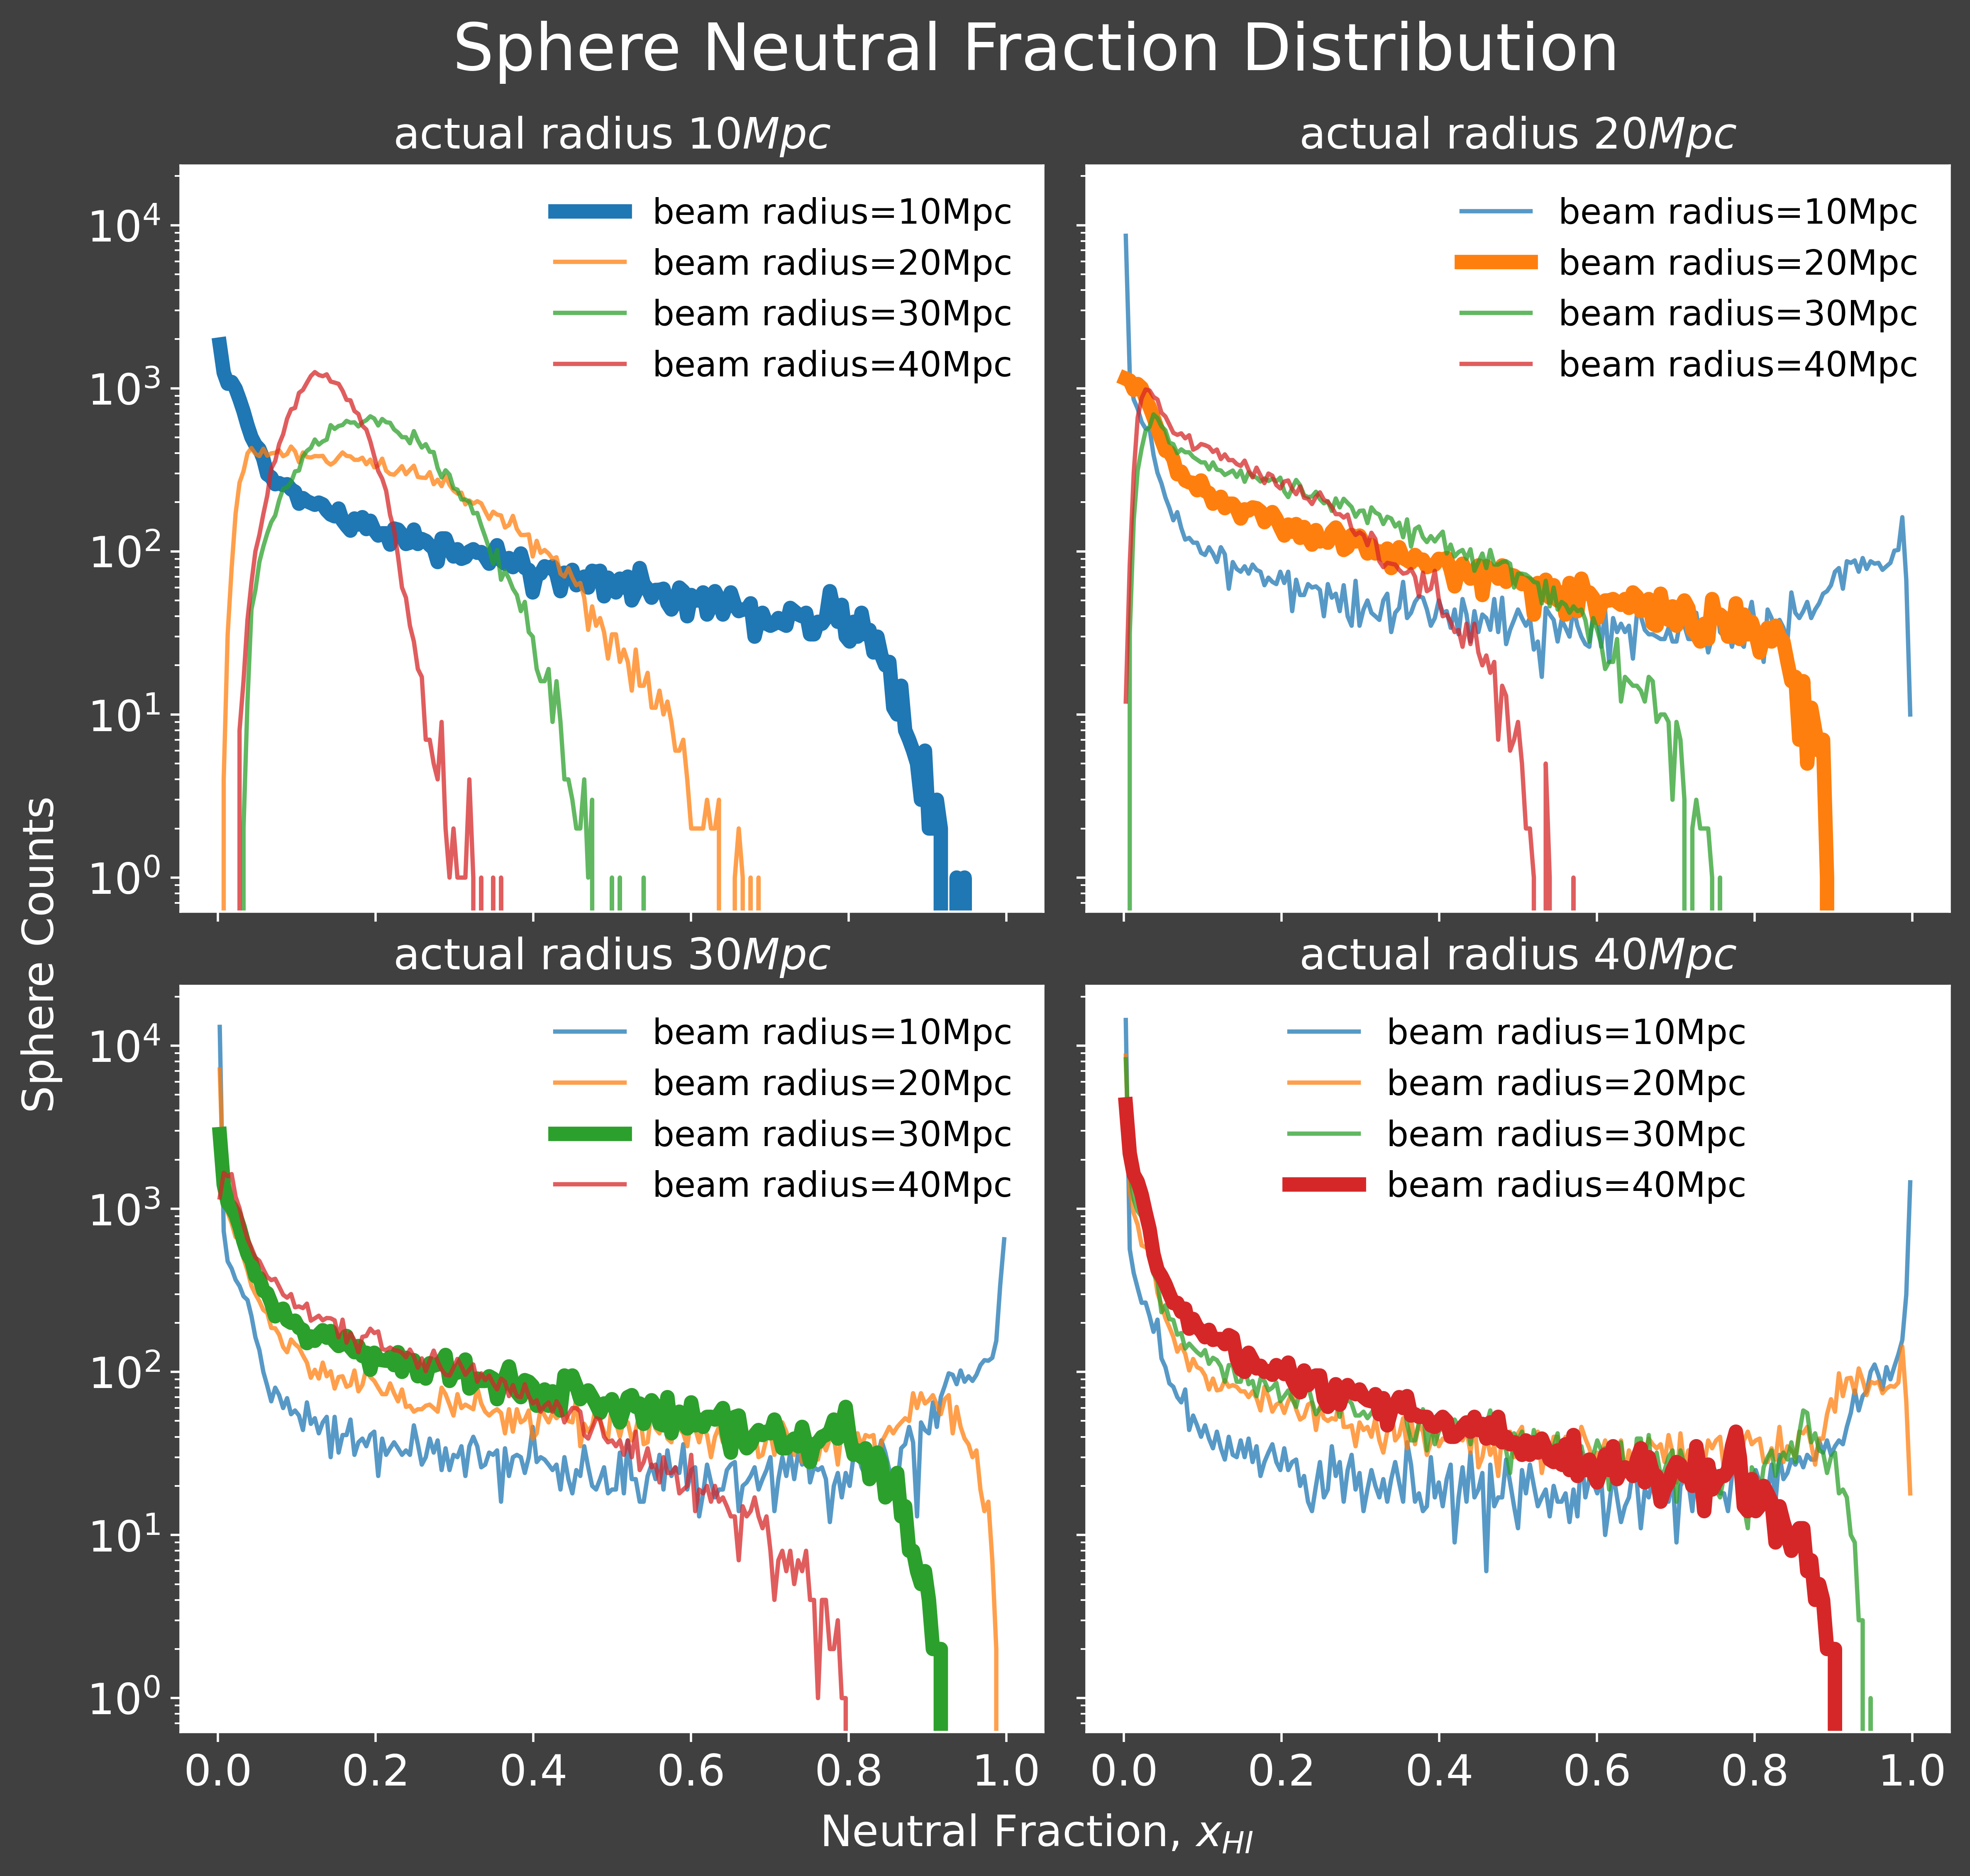

In [15]:
iterations = np.array([1445, 180, 54, 22])
overall_neutral_fractions = np.array([0.2   , 0.2037, 0.1951, 0.2036])
sphere_radii=[10, 20, 30, 40]
bins = int(2e2)
histogram(
    y1s=complete_neutral_spheres_statistics,       
    marker_lines=['-']*len(sphere_radii),
    y1s_labels=[f'beam radius={radius:d}Mpc' for radius in sphere_radii],
    legend_alpha=0,
    bin_num=bins,   
    title=[f'actual radius ${sphere_radii[i]:d}Mpc$' for i in range(len(sphere_radii))],
    shared_title=f'Sphere Neutral Fraction Distribution',
    shared_title_y_position=0.95,
    shared_y_label='Sphere Counts',
    shared_x_label=f'Neutral Fraction, $x_{{HI}}$',
    shared_x_label_y_position=0.070,
    shared_y_label_x_position=0.055,
    figure_shape=(2,2), 
    figure_size=(11,10),
    vertical_gap=0.1,
    horizontal_gap=0.05,
    y_scale='log',
#     y_notation='sci',
    share_y_axis=True,
    dpi=500,
    color='w'
)